# PlantaeK

# Description:
PlantaeK: A leaf database of native plants of Jammu and Kashmir

Description:
This dataset contains 2153 images of healthy and unhealthy plant leaves divided 16 categories by species and state of health. The images are in high resolution JPG format.

Note: Each image is a separate download. Some might rarely fail, therefore make sure to restart if that happens. An exception will be raised in case one of the downloads repeatedly fails.
Dataset URL: https://data.mendeley.com/datasets/t6j2h22jpx/1 License: http://creativecommons.org/licenses/by/4.0

Homepage: https://data.mendeley.com/datasets/t6j2h22jpx/1

Source code: tfds.image_classification.PlantaeK

Versions:

0.1.0 (default): No release notes.
Download size: 4.30 GiB

Dataset size: Unknown size




@article{DBLP:journals/corr/HughesS15,
  author    = {David P. Hughes and
               Marcel Salath{'{e} } },
  title     = {An open access repository of images on plant health to enable the
               development of mobile disease diagnostics through machine
               learning and crowdsourcing},
  journal   = {CoRR},
  volume    = {abs/1511.08060},
  year      = {2015},
  url       = {http://arxiv.org/abs/1511.08060},
  archivePrefix = {arXiv},
  eprint    = {1511.08060},
  timestamp = {Mon, 13 Aug 2018 16:48:21 +0200},
  biburl    = {https://dblp.org/rec/bib/journals/corr/HughesS15},
  bibsource = {dblp computer science bibliography, https://dblp.org}
}

In [1]:
!pip install scikit-plot

In [2]:
import os
import pathlib
from PIL import Image

import sklearn as sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import scikitplot as skplt

import IPython.display as display
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Conv2D, Dense, Dropout, Flatten, MaxPooling2D, Softmax)
import tensorflow_hub as hub
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [3]:
#@title Default title text
#data_dir = tf.keras.utils.get_file(
##    'plants',
#    'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/tywbtsjrjv-1.zip',
#    untar=True)

#Print data path
#print("cd", dir(data_dir))




!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/t6j2h22jpx-1.zip

--2020-11-16 15:01:28--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/t6j2h22jpx-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.65.107
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.65.107|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4521176918 (4.2G) [application/octet-stream]
Saving to: ‘t6j2h22jpx-1.zip’

t6j2h22jpx-1.zip    100%[===================>]   4.21G  31.0MB/s    in 5m 35s  

2020-11-16 15:07:04 (12.9 MB/s) - ‘t6j2h22jpx-1.zip’ saved [4521176918/4521176918]



In [4]:
!unzip /content/t6j2h22jpx-1.zip -d plants

Archive:  /content/t6j2h22jpx-1.zip
   creating: plants/CRANBERRY/
   creating: plants/CRANBERRY/DISEASED/
  inflating: plants/CRANBERRY/DISEASED/cranberry_d042.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d006.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d060.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d024.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d051.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d015.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d033.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d086.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d068.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d059.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d077.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d046.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d082.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d064.JPG  
  inflating: plants/CRANBERRY/DISEASED/cranberry_d028

In [ ]:
#!unzip plants/Plant_leaf_diseases_dataset_with_augmentation.zip
!unzip plants/Plant_leaf_diseases_dataset_without_augmentation.zip

In [10]:
data_dir = '/content/plants/'
data_dir = pathlib.Path(data_dir)

image_count_healthy = len(list(data_dir.glob('*/HEALTHY/*.JPG')))
image_count_diseased = len(list(data_dir.glob('*/DISEASED/*.JPG')))
print("There are", image_count_diseased, " DISEASED images.")
print("There are", image_count_healthy, " HEALTHY images.")


CLASS_NAMES = np.array(
    [item.name for item in data_dir.glob('*') ])
print("These are the available classes:", CLASS_NAMES)
print(data_dir)
classes = list(CLASS_NAMES)
print(classes)

There are 933  DISEASED images.
There are 1219  HEALTHY images.
These are the available classes: ['PEACH' 'GRAPES' 'CHERRY' 'PEAR' 'WALNUT' 'CRANBERRY' 'APRICOT' 'APPLE']
/content/plants
['PEACH', 'GRAPES', 'CHERRY', 'PEAR', 'WALNUT', 'CRANBERRY', 'APRICOT', 'APPLE']


In [12]:

dic ={}
for name in classes:
  roses = list(data_dir.glob(name + "/*/*"))
  print(name, len(roses))
  dic[name] = len(roses)


PEACH 331
GRAPES 171
CHERRY 212
PEAR 228
WALNUT 378
CRANBERRY 212
APRICOT 270
APPLE 352


{'PEACH': 331, 'GRAPES': 171, 'CHERRY': 212, 'PEAR': 228, 'WALNUT': 378, 'CRANBERRY': 212, 'APRICOT': 270, 'APPLE': 352}


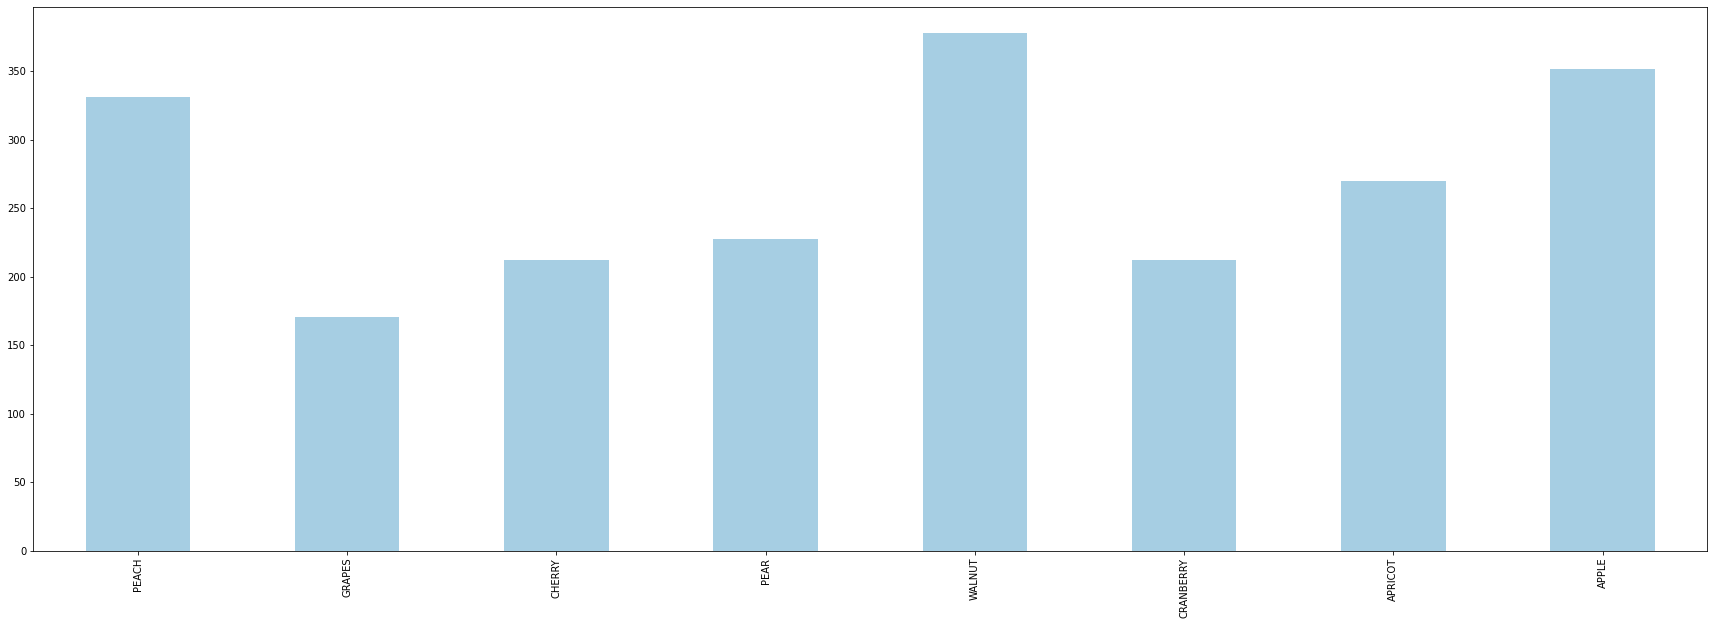

In [13]:
import pandas  as pd
print(dic)
df = pd.DataFrame.from_dict(dic , orient='index')
df = df
df.plot.bar(figsize = (30,10) , legend =False, colormap='Paired' )


In [24]:

dic_dis ={}
dic_heal ={}
for name in classes:
  roses = list(data_dir.glob(name + "/DISEASED/*"))
  heal  = list(data_dir.glob(name + "/HEALTHY/*"))
  print(name, len(roses) , len(heal))
  dic_dis[name] = len(roses)
  dic_heal[name] = len(heal)


PEACH 18 313
GRAPES 9 162
CHERRY 95 117
PEAR 58 170
WALNUT 285 93
CRANBERRY 94 118
APRICOT 184 86
APPLE 192 160


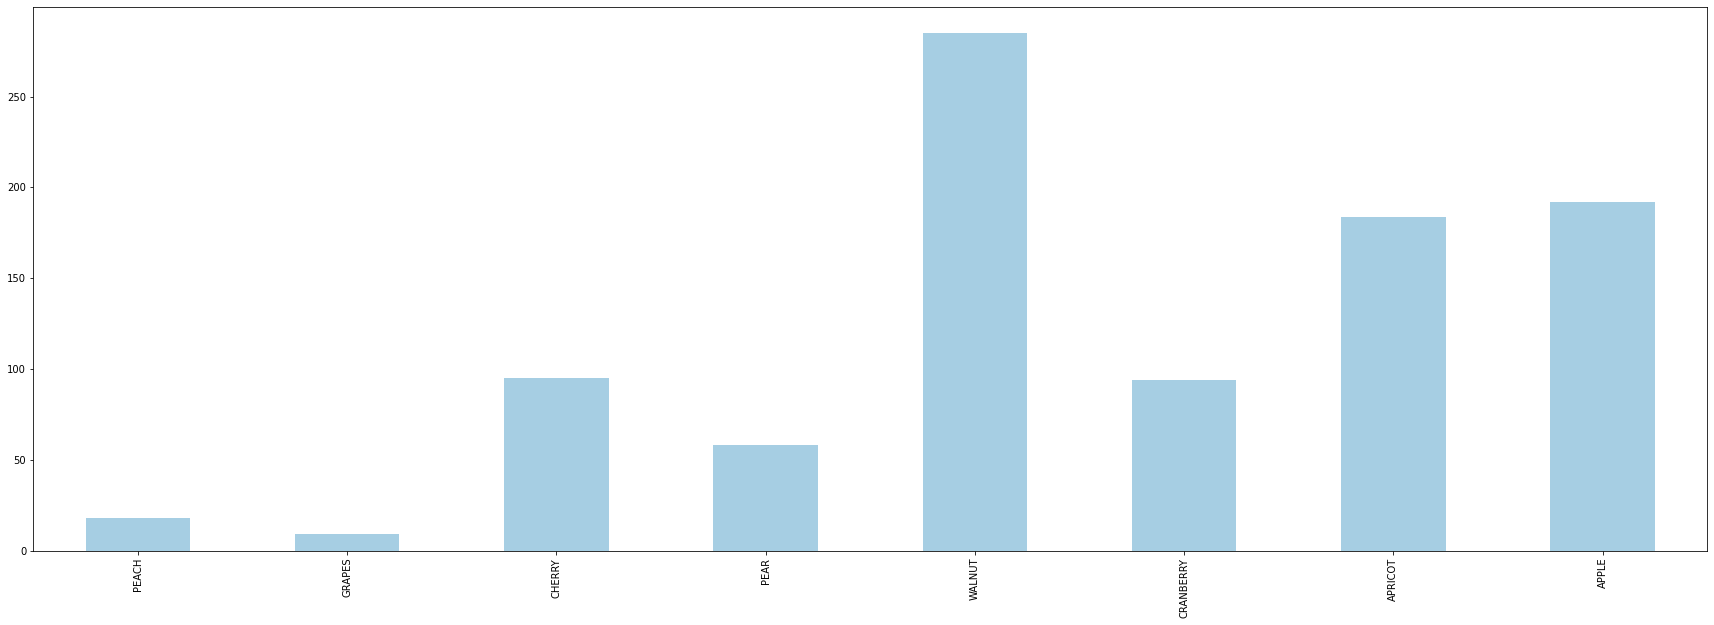

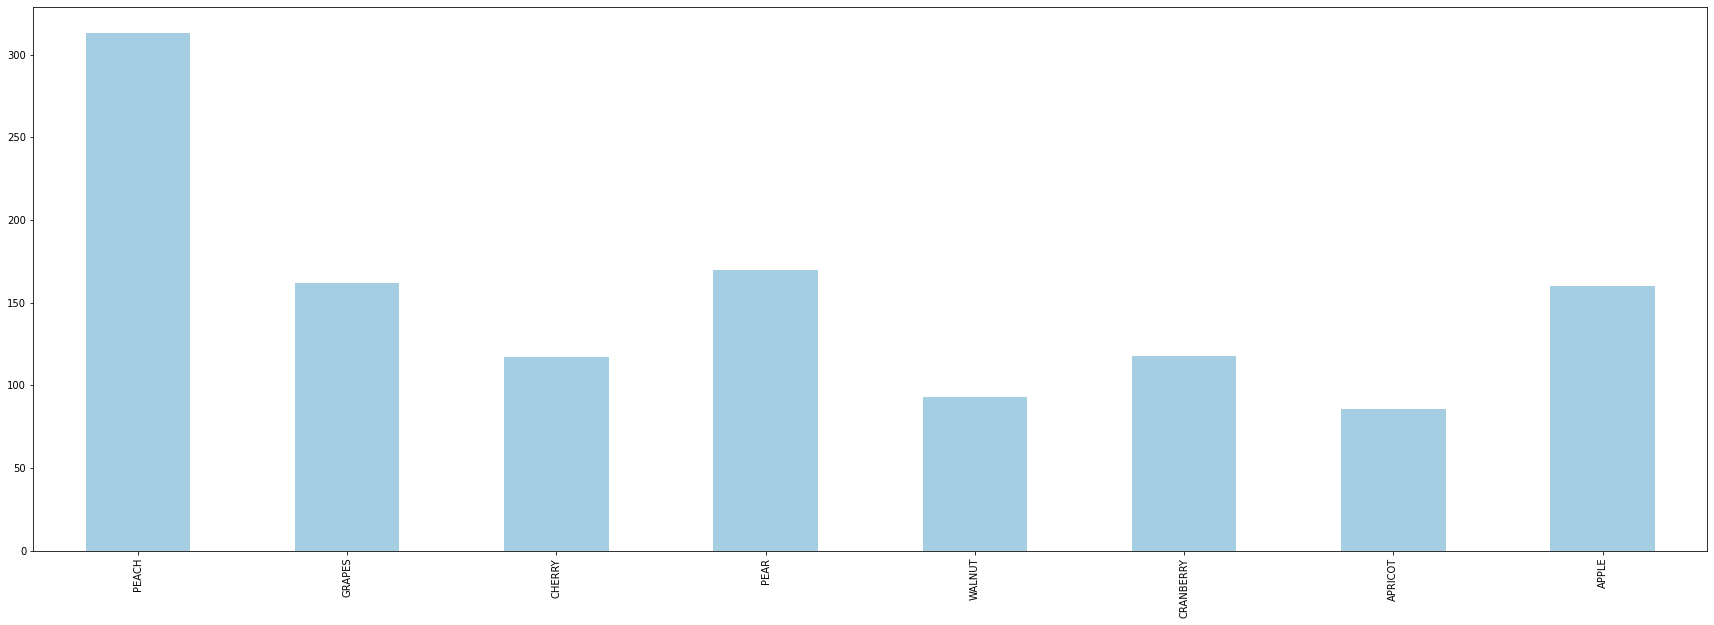

In [25]:
  import pandas  as pd
 
  df_dis = pd.DataFrame.from_dict(dic_dis , orient='index')
  df_dis.plot.bar(figsize = (30,10) , legend =False, colormap='Paired' )

  df_heal = pd.DataFrame.from_dict(dic_heal , orient='index')
  df_heal.plot.bar(figsize = (30,10) , legend =False, colormap='Paired' )


In [27]:
batch_size = 8
img_height = 224
img_width = 224



train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 2153 files belonging to 8 classes.
Using 1508 files for training.


In [29]:
train_ds.class_names

['APPLE',
 'APRICOT',
 'CHERRY',
 'CRANBERRY',
 'GRAPES',
 'PEACH',
 'PEAR',
 'WALNUT']

In [72]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2153 files belonging to 8 classes.
Using 645 files for validation.


In [31]:
df_train_ds ={}
for i in range(0,8):
  #print(train_ds.class_names[i]  ," : ",  len(train_ds.class_names[i])*6, "|" ,len(val_ds.class_names[i])*6 )
  df_train_ds[train_ds.class_names[i]] = [len(train_ds.class_names[i])*8 ,len(val_ds.class_names[i])*8 ]

df_train_ds= pd.DataFrame.from_dict(df_train_ds ,orient='index', columns=[ "train " , "valid"])
df_train_ds


,train,valid
APPLE,40,40
APRICOT,56,56
CHERRY,48,48
CRANBERRY,72,72
GRAPES,48,48
PEACH,40,40
PEAR,32,32
WALNUT,48,48


Text(0.5, 1.0, 'Train and Test Sets')

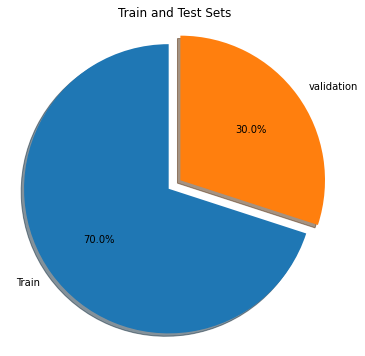

In [32]:
labels = ['Train', 'validation']
sizes = [len(train_ds), len(val_ds)]
explode = (0, 0.1)

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Train and Test Sets')


In [33]:
class_names = train_ds.class_names
print(class_names)

['APPLE', 'APRICOT', 'CHERRY', 'CRANBERRY', 'GRAPES', 'PEACH', 'PEAR', 'WALNUT']


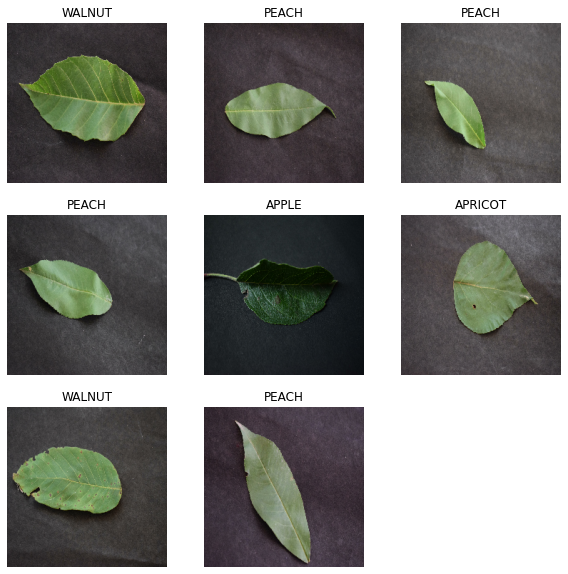

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


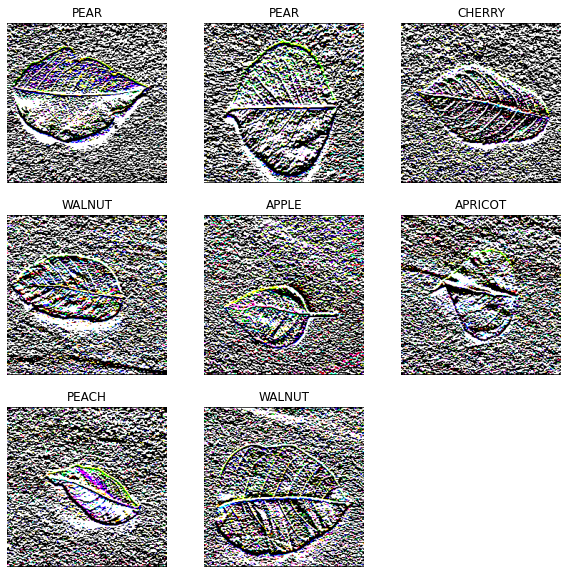

In [45]:
import cv2





plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    sobelx = cv2.Sobel(images[i].numpy().astype("uint8"),int(cv2.CV_64F),1,0,ksize=3) #ksize=3 means we'll be using the 3x3 Sobel filter
    sobely = cv2.Sobel(images[i].numpy().astype("uint8"),int(cv2.CV_64F),0,1,ksize=3)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(sobely, cmap='gray')
    plt.title(class_names[labels[i]])
    plt.axis("off")

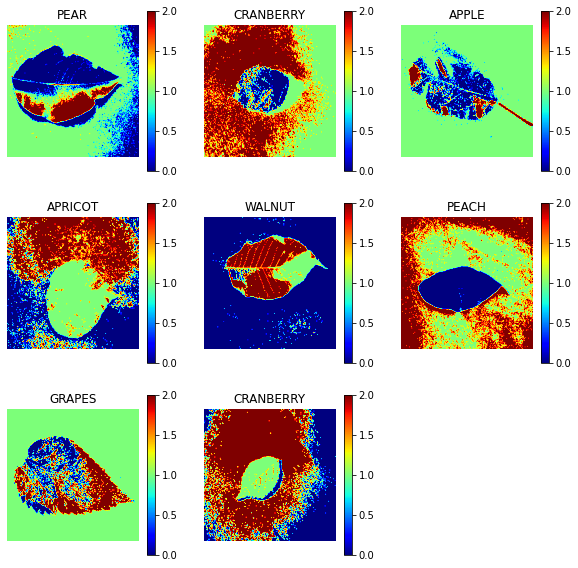

In [53]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3) #2 as we're still trying to seperate the lighter coloured nuclei from the darker coloured background 





plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(8):
    kmeans.fit(images[i].numpy().astype('uint8').reshape(images[i].shape[0]*images[i].shape[1],3))
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(kmeans.labels_.reshape(224,224),cmap='jet')
    plt.title(class_names[labels[i]])
    plt.colorbar()
    plt.axis("off")

In [54]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = train_ds.shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [56]:
from tensorflow.keras import layers
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3))


#EFFICIENT-NETB7:
EfficientNets are a family of image classification models, which achieve state-of-the-art accuracy, yet being an order-of-magnitude smaller and faster than previous models.

#Mingxing Tan and Quoc V. Le: EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks, ICML 2019.
We develop EfficientNets based on AutoML and Compound Scaling. In particular, we first use AutoML MNAS Mobile framework to develop a mobile-size baseline network, named as EfficientNet-B7; Then, we use the compound scaling method to scale up this baseline to obtain EfficientNet-B1 to EfficientNet-B7.

#This TF-Hub module uses the Keras based implementation of EfficientNet-B7. The default signature is used to get image feature vectors. If you want the full model including the classification it was originally trained for, use module https://tfhub.dev/tensorflow/efficientnet/b7/classification/1 instead.

In [63]:

nclasses  = 8

module_selection = "mobilenet_v2_100_224"
module_handle = "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1" 

transfer_model = tf.keras.Sequential([
    normalization_layer,
    hub.KerasLayer(module_handle, trainable=False),
    tf.keras.layers.Dense(nclasses, activation='softmax')
])
transfer_model.build((None,)+(224, 224, 3))
transfer_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_1 (KerasLayer)   (None, 2560)              64097680  
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 20488     
Total params: 64,118,168
Trainable params: 20,488
Non-trainable params: 64,097,680
_________________________________________________________________


In [64]:
transfer_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [65]:
History = transfer_model.fit(train_ds,
  validation_data=val_ds,
  steps_per_epoch =  10,
  validation_steps = 60,
  epochs=130)

Epoch 1/130
10/10 [==============================] - 279s 28s/step - loss: 1.9249 - accuracy: 0.2625 - val_loss: 1.7175 - val_accuracy: 0.3958
Epoch 2/130
10/10 [==============================] - 275s 27s/step - loss: 1.5892 - accuracy: 0.4625 - val_loss: 1.4693 - val_accuracy: 0.4688
Epoch 3/130
10/10 [==============================] - 274s 27s/step - loss: 1.2153 - accuracy: 0.7000 - val_loss: 1.1193 - val_accuracy: 0.7792
Epoch 4/130
10/10 [==============================] - 274s 27s/step - loss: 0.9117 - accuracy: 0.7875 - val_loss: 0.9955 - val_accuracy: 0.7500
Epoch 5/130
10/10 [==============================] - 273s 27s/step - loss: 0.8596 - accuracy: 0.8500 - val_loss: 0.8430 - val_accuracy: 0.8333
Epoch 6/130
10/10 [==============================] - 273s 27s/step - loss: 0.7623 - accuracy: 0.8750 - val_loss: 0.7501 - val_accuracy: 0.8583
Epoch 7/130
10/10 [==============================] - 273s 27s/step - loss: 0.6295 - accuracy: 0.8750 - val_loss: 0.6722 - val_accuracy: 0.8750

 9/10 [==========================>...] - 297s 33s/step - loss: 0.3876 - accuracy: 0.8889 - val_loss: 0.3636 - val_accuracy: 0.9250


In [ ]:
transfer_model.save("model.h5")

In [66]:
labels = list(History.history.keys())
print(labels)

['loss', 'accuracy', 'val_loss', 'val_accuracy']


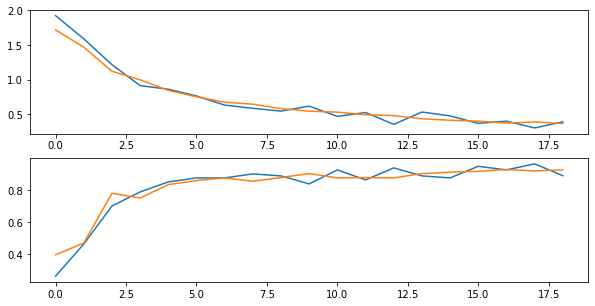

In [67]:
from matplotlib import pyplot as plt




fig, axs = plt.subplots(2, 1 , figsize=(10,5))
#axs[0, 0].plot(x, y)
##axs[0, 0].set_title('Axis [0, 0]')
#axs[0, 1].plot(x, y, 'tab:orange')
#axs[0, 1].set_title('Axis [0, 1]')
#axs[1, 0].plot(x, -y, 'tab:green')
#axs[1, 0].set_title('Axis [1, 0]')
#axs[1, 1].plot(x, -y, 'tab:red')
#axs[1, 1].set_title('Axis [1, 1]')



#plt.yscale('log')
axs[0].plot(History.history['loss'])
axs[0].plot(History.history['val_loss'])
axs[1].plot(History.history['accuracy'])
axs[1].plot(History.history['val_accuracy'])


In [ ]:
reconstructed_model = tf.keras.models.load_model("model.h5",custom_objects={'KerasLayer':hub.KerasLayer})

#reconstructed_model.build((None,)+(224, 224, 3))
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 224, 224, 3)       0         
_________________________________________________________________
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_2 (Dense)              (None, 39)                49959     
Total params: 2,307,943
Trainable params: 49,959
Non-trainable params: 2,257,984
_________________________________________________________________


In [68]:
#for image_batch , labels_batch in val_ds:
#  break
#predictions = transfer_model.predict(image_batch)
transfer_model.evaluate(val_ds.take(100))

81/81 [==============================] - 343s 4s/step - loss: 0.3559 - accuracy: 0.9302


[0.3558811843395233, 0.930232584476471]

In [ ]:
#batch_size = 300
#img_height = 224
#img_width = 224



#test_ds = tf.keras.preprocessing.image_dataset_from_directory(
#  data_dir,
#  validation_split=0.5,
#  subset="validation",
#  seed=123,
#  image_size=(img_height, img_width),
#  batch_size=batch_size)






Found 55448 files belonging to 39 classes.
Using 27724 files for validation.


In [69]:
predictions = []
real_label  = []
for image_batch , labels_batch in val_ds.take(2300):
  
  predictions.extend(np.argmax(transfer_model.predict(image_batch), axis =-1))
  real_label.extend(labels_batch.numpy())

In [70]:
print(len(real_label))

645


In [ ]:
#predictions_pred =np.argmax(predictions, axis=-1)

In [73]:
 from sklearn.metrics import classification_report
cl_report = classification_report(predictions,real_label , target_names=list(val_ds.class_names))
print("the classification report : \n" , cl_report)

the classification report : 
               precision    recall  f1-score   support

       APPLE       0.99      1.00      0.99        97
     APRICOT       0.96      0.99      0.97        89
      CHERRY       0.76      0.90      0.82        52
   CRANBERRY       0.94      0.98      0.96        60
      GRAPES       0.98      0.96      0.97        53
       PEACH       0.99      0.90      0.95       115
        PEAR       0.82      0.98      0.89        59
      WALNUT       0.94      0.80      0.86       120

    accuracy                           0.93       645
   macro avg       0.92      0.94      0.93       645
weighted avg       0.94      0.93      0.93       645



['APPLE', 'APRICOT', 'CHERRY', 'CRANBERRY', 'GRAPES', 'PEACH', 'PEAR', 'WALNUT']


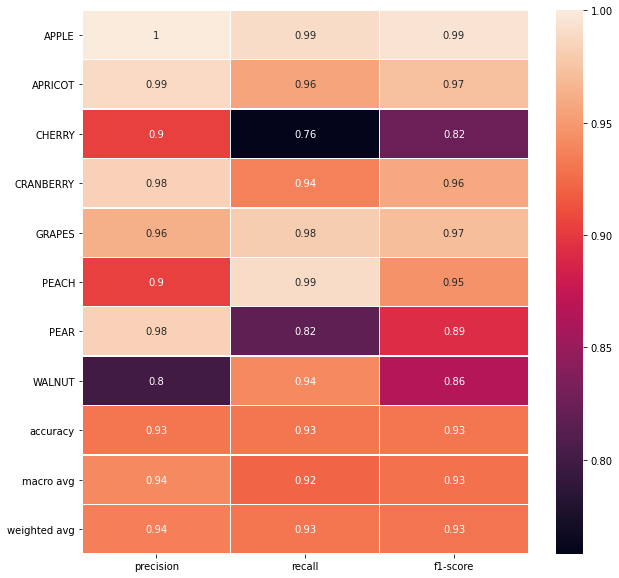

In [75]:

plt.figure(figsize = (10,10))
#print("the classification report : \n" , cl_report)
cl_report = classification_report(real_label,predictions, target_names = list(val_ds.class_names), output_dict=True)
sns.heatmap(pd.DataFrame(cl_report).iloc[:-1, :].T, annot= True, linewidths=.5)
print(list(val_ds.class_names))

In [76]:
import sklearn as sklearn
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(real_label, predictions)
print(cm)

[[ 97   0   0   0   0   1   0   0]
 [  0  88   0   0   0   3   1   0]
 [  0   0  47   0   1   2   0  12]
 [  0   0   0  59   1   0   0   3]
 [  0   0   0   1  51   0   0   0]
 [  0   0   0   0   0 104   0   1]
 [  0   0   4   0   0   1  58   8]
 [  0   1   1   0   0   4   0  96]]


In [80]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

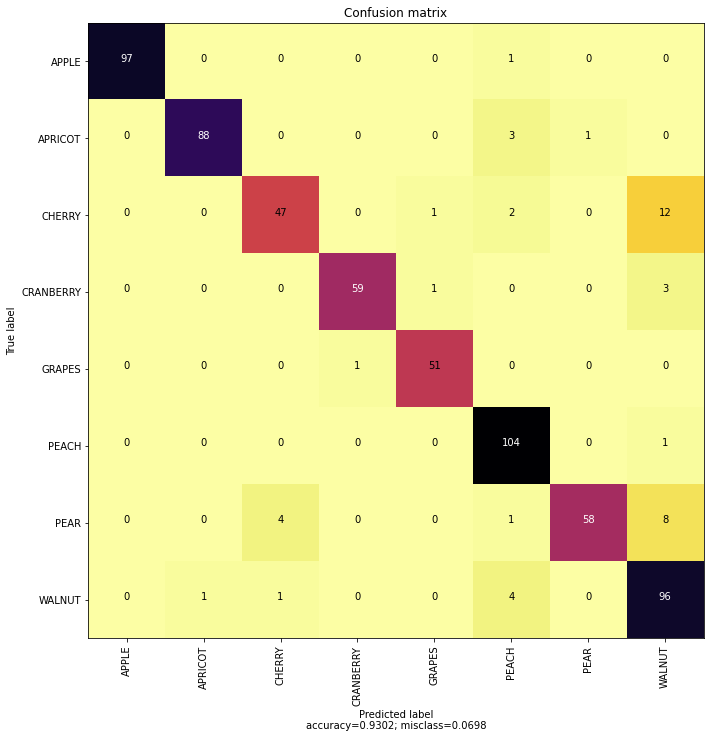

In [81]:
plot_confusion_matrix(cm = cm,
                          target_names= list(val_ds.class_names),
                          title='Confusion matrix',
                          cmap='inferno_r',
                          normalize=False)

In [82]:
CLS = list(val_ds.class_names)

In [86]:


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img.numpy().astype("uint8"))

  predicted_label = np.argmax(predictions_array)
  #print(predicted_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(CLS[predicted_label],
                                100*np.max(predictions_array),
                                CLS[true_label]),
                                color=color)







def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(8) , rotation =90)
  plt.yticks([])
  thisplot = plt.bar(range(8), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  #print(predicted_label)
  #print(true_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [84]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=300)

Found 2153 files belonging to 8 classes.
Using 645 files for validation.


In [85]:


for imgs , lbs in test_ds.take(1):
  
  pred = transfer_model.predict(imgs)
  

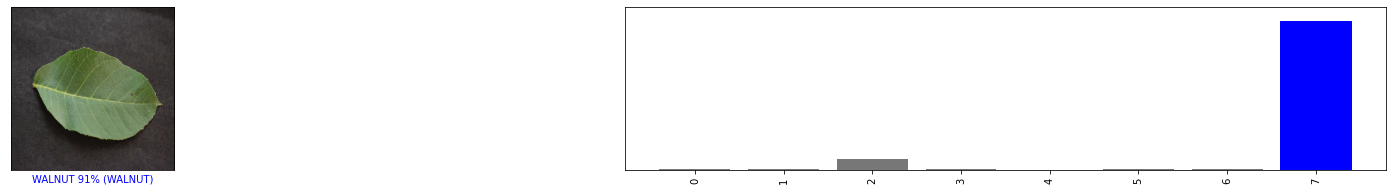

In [87]:

i = 1
plt.figure(figsize=(30,3))
plt.subplot(1,2,1)



plot_image(i, pred[i], lbs, imgs)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  lbs)
plt.show()

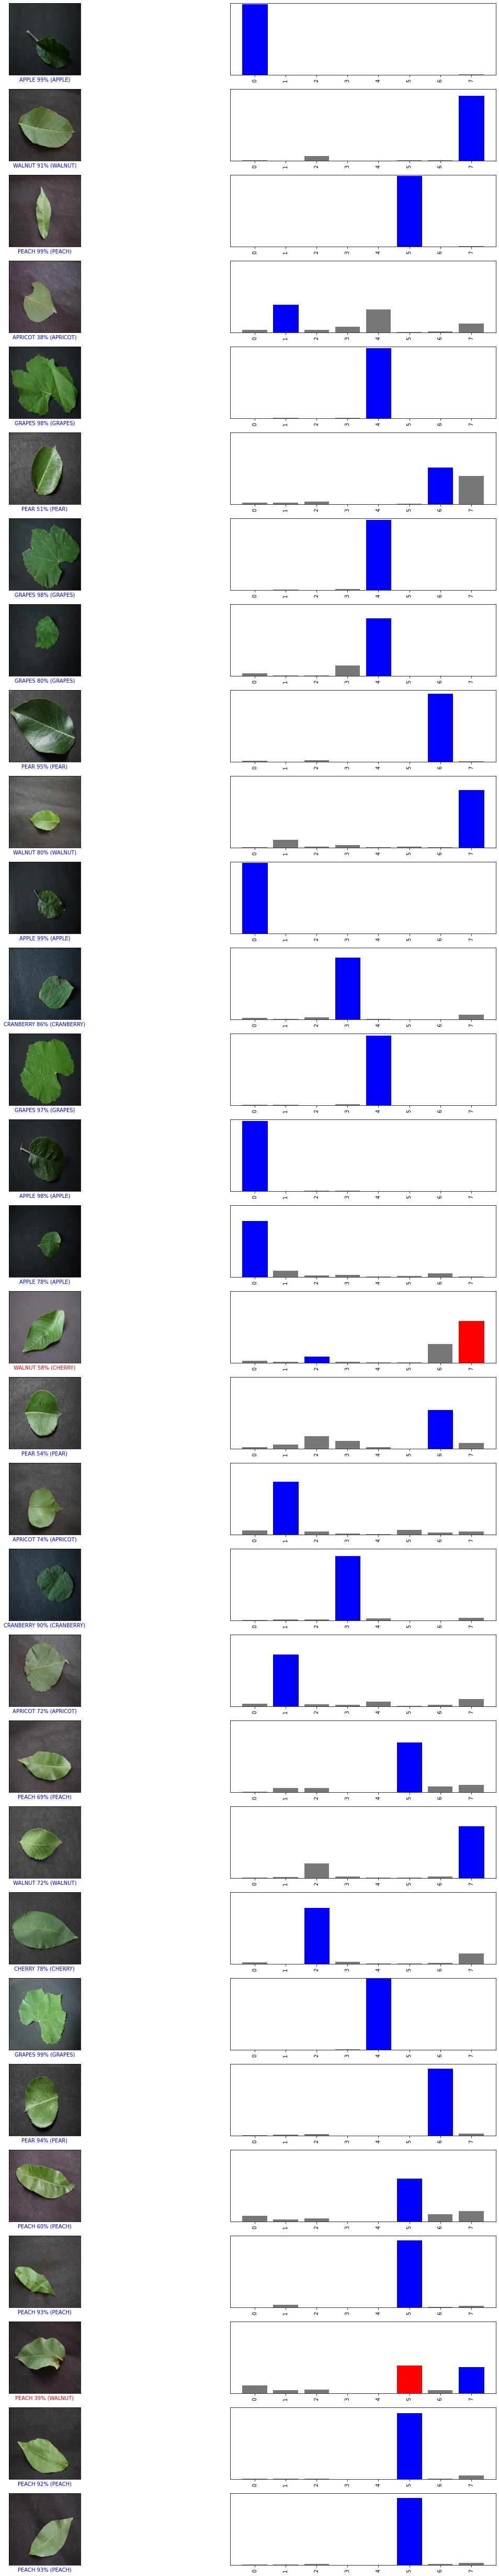

In [88]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 30
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(10*2*num_cols, 3*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], lbs, imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], lbs)

plt.show()


In [89]:
!pip install shap

     |████████████████████████████████| 327kB 5.8MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463910 sha256=6451da50ae98f4cdb237da01b2156a76ed6ce71b14a21859206320216cdc85f2
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [ ]:
import shap
import numpy as np
#shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough
# select a set of background examples to take an expectation over
background = imgs.numpy()[np.random.choice(imgs.shape[0], 100, replace=False)]

# explain predictions of the model on three images
e = shap.DeepExplainer(transfer_model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

shap_values = e.shap_values(imgs[1:5])
# plot the feature attributions
shap.image_plot(shap_values, -imgs[1:5].numpy())